HW_5_2~6 by 22000690 정이주

1. Objective : This code is for Data Handling time series

2. Input

  * Data file (data_set_train.xlsx)

3. Output

  * Shows what the data looks like
  * Visualization of data
  * Each dong’s average price change over time
  * Simple Smoothing using 5-MA
  * Correlations
  * The price trend in YeockSam-dong
  * Autocorrelation of the price trend

# 1️⃣ Data Handling
## Import libraries & Load Data

In [3]:
#data handling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('data_set_train.xlsx')

## See How Data Look Like

In [4]:
df.shape

(17400, 29)

In [5]:
df.columns

Index(['aptnm(아파트 이름)', 'yyyyqrt(거래년도 분기별)', 'price(가격)', 'con_year(건축년도)',
       'dong(동)', 'area(면적)', 'floor(층수)', 'Latitude(위도)', 'Longtitude(경도)',
       'gdp', 'e_grwth(경제성장률)', 'Seoul_l.rate(지가상승률)', 'house_rate(담보대출금리)',
       'dis_park(국립 공원과의 거리)', 'dis_highschool(고등학교와의 거리)',
       'dis_reconst(재개발 지역과의 거리)', 'dis_univ(대학과의 거리)',
       'dis_hospital(종합 병원과의 거리)', 'dis_museum(국립 박물관과의 거리)',
       'dis_subway(지하철역과의 거리)', 'brand_r(유명 아파트 브랜드순)', 'n_home(세대수)',
       'n_dong(동수)', 'parking_per(세대별 주차장수)', 'Heater(난방 시스템)', 'Yongpae(용적률)',
       'Gunpae(건폐율)', 'Highest(최고층)', 'Lowest(최저층)'],
      dtype='object')

In [6]:
df.describe()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
count,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,...,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,16137.000000,15771.000000,17400.000000,17400.000000
mean,80334.523736,1992.928563,71.217003,7.451322,37.494002,127.060032,330970.131494,3.659925,0.064492,6.054785,...,1063.010719,985.858326,677.704437,1.147816,1724.199713,30.414713,251.880771,24.703887,13.693218,11.013908
std,45557.247993,10.250319,34.905756,5.627460,0.012002,0.017059,62803.867282,1.806509,0.322120,0.607412,...,523.568572,374.407888,394.313279,3.256703,1852.886244,42.795932,209.698580,15.030962,7.558171,5.629246
min,1000.000000,1978.000000,16.780000,-1.000000,37.460256,127.018178,225613.000000,-1.900000,-2.642750,5.263300,...,41.632692,87.490136,47.486971,0.000000,9.000000,1.000000,72.000000,12.000000,4.000000,3.000000
25%,53500.000000,1982.000000,42.550000,3.000000,37.484704,127.048360,277832.000000,2.700000,0.001632,5.499746,...,635.176776,693.430670,318.596967,0.000000,206.000000,2.000000,80.000000,16.000000,5.000000,5.000000
50%,74500.000000,1993.000000,59.950000,5.000000,37.493391,127.058356,335960.000000,3.500000,0.016252,5.883320,...,975.124492,1032.477721,579.455311,0.000000,900.000000,8.000000,223.000000,19.000000,14.000000,12.000000
75%,96000.000000,2004.000000,84.910000,11.000000,37.499314,127.071381,385702.000000,4.900000,0.099044,6.576878,...,1459.461217,1220.076628,899.616370,0.000000,2840.000000,34.000000,285.000000,26.000000,21.000000,15.000000
max,570000.000000,2014.000000,273.830000,45.000000,37.533197,127.103555,446835.000000,7.400000,0.624673,7.415442,...,3470.829811,3323.864542,2559.068365,15.000000,5040.000000,124.000000,2435.000000,204.000000,46.000000,26.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aptnm(아파트 이름)              17400 non-null  object 
 1   yyyyqrt(거래년도 분기별)          17400 non-null  object 
 2   price(가격)                  17400 non-null  float64
 3   con_year(건축년도)             17400 non-null  float64
 4   dong(동)                    17400 non-null  object 
 5   area(면적)                   17400 non-null  float64
 6   floor(층수)                  17400 non-null  float64
 7   Latitude(위도)               17400 non-null  float64
 8   Longtitude(경도)             17400 non-null  float64
 9   gdp                        17400 non-null  float64
 10  e_grwth(경제성장률)             17400 non-null  float64
 11  Seoul_l.rate(지가상승률)        17400 non-null  float64
 12  house_rate(담보대출금리)         17400 non-null  float64
 13  dis_park(국립 공원과의 거리)       17400 non-null  flo

In [8]:
# noused codes
df['yyyyqrt(거래년도 분기별)'].unique()

array(['2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2',
       '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4',
       '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
       '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3'], dtype=object)

## Data Cleaning

In [9]:
# Checking missing cells
df[df['Yongpae(용적률)'].isnull()].head()

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
399,개포주공6단지,2006Q1,77100.0,1983.0,개포동,73.02,10.0,37.478407,127.061375,225613.0,...,1486.178329,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
400,개포주공6단지,2006Q1,60600.0,1983.0,개포동,60.13,14.0,37.494581,127.075275,225613.0,...,316.902800,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
401,개포주공6단지,2006Q1,49000.0,1983.0,개포동,53.06,13.0,37.484335,127.071381,225613.0,...,1155.513971,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
402,개포주공6단지,2006Q1,59400.0,1983.0,개포동,60.13,2.0,37.484609,127.067275,225613.0,...,1160.598717,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
403,개포주공6단지,2006Q1,59500.0,1983.0,개포동,60.13,14.0,37.478407,127.061375,225613.0,...,1486.178329,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0


In [10]:
# Replace NaN data with the average value of the column values
df['Yongpae(용적률)']=df['Yongpae(용적률)'].replace(np.nan,df['Yongpae(용적률)'].mean())
df['Gunpae(건폐율)']=df['Gunpae(건폐율)'].replace(np.nan,df['Gunpae(건폐율)'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aptnm(아파트 이름)              17400 non-null  object 
 1   yyyyqrt(거래년도 분기별)          17400 non-null  object 
 2   price(가격)                  17400 non-null  float64
 3   con_year(건축년도)             17400 non-null  float64
 4   dong(동)                    17400 non-null  object 
 5   area(면적)                   17400 non-null  float64
 6   floor(층수)                  17400 non-null  float64
 7   Latitude(위도)               17400 non-null  float64
 8   Longtitude(경도)             17400 non-null  float64
 9   gdp                        17400 non-null  float64
 10  e_grwth(경제성장률)             17400 non-null  float64
 11  Seoul_l.rate(지가상승률)        17400 non-null  float64
 12  house_rate(담보대출금리)         17400 non-null  float64
 13  dis_park(국립 공원과의 거리)       17400 non-null  flo

## See How Data Look Like 2

In [12]:
df['dong(동)'].value_counts()

개포동     5866
역삼동     3729
대치동     2411
수서동     1937
도곡동     1032
청담동      868
논현동      636
삼성동      569
일원동      333
세곡동       17
압구정동       2
Name: dong(동), dtype: int64

In [13]:
df['yyyyqrt(거래년도 분기별)'].value_counts()

2017Q1    780
2006Q1    703
2006Q3    682
2006Q4    670
2006Q2    562
2017Q2    537
2016Q3    419
2008Q2    416
2012Q4    416
2015Q2    405
2011Q3    397
2016Q1    389
2007Q4    386
2008Q1    385
2015Q3    373
2015Q1    370
2016Q2    369
2011Q4    367
2011Q1    357
2011Q2    353
2010Q1    353
2017Q3    352
2007Q2    349
2015Q4    348
2013Q3    343
2014Q4    336
2013Q2    334
2009Q1    325
2013Q1    325
2013Q4    323
2014Q1    317
2007Q3    315
2010Q4    313
2010Q3    310
2016Q4    306
2014Q3    304
2009Q2    303
2014Q2    298
2009Q3    295
2009Q4    280
2012Q2    277
2007Q1    270
2010Q2    241
2012Q1    238
2008Q3    219
2012Q3    204
2008Q4    186
Name: yyyyqrt(거래년도 분기별), dtype: int64

## Basic Methods 

In [14]:
# Slicing Dataframe - 1
data1= df.loc[:,'yyyyqrt(거래년도 분기별)' : 'Longtitude(경도)']
data1.head()

,yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도)
0,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545
1,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545
2,2006Q1,73000.0,1982.0,개포동,50.38,3.0,37.478407,127.061375
3,2006Q1,70000.0,1982.0,개포동,50.64,5.0,37.484609,127.067275
4,2006Q1,40000.0,1982.0,개포동,35.44,4.0,37.482445,127.051278


In [15]:
# Slicing Dataframe - 2
data1= df[['yyyyqrt(거래년도 분기별)','price(가격)','dong(동)','Latitude(위도)', 'Longtitude(경도)',
           'Seoul_l.rate(지가상승률)','dis_subway(지하철역과의 거리)' ]]
data1.head()

,yyyyqrt(거래년도 분기별),price(가격),dong(동),Latitude(위도),Longtitude(경도),Seoul_l.rate(지가상승률),dis_subway(지하철역과의 거리)
0,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
1,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555


In [16]:
data1.tail()

,yyyyqrt(거래년도 분기별),price(가격),dong(동),Latitude(위도),Longtitude(경도),Seoul_l.rate(지가상승률),dis_subway(지하철역과의 거리)
17395,2017Q3,179000.0,청담동,37.526956,127.053126,0.069818,874.719438
17396,2017Q3,122500.0,역삼동,37.496260,127.046404,0.069818,944.717800
17397,2017Q3,64000.0,역삼동,37.491379,127.034880,0.069818,812.764336
17398,2017Q3,170000.0,청담동,37.524675,127.056226,0.069818,717.729425
17399,2017Q3,170000.0,청담동,37.524675,127.056226,0.069818,717.729425


# 2️⃣ Real-Estate Time Series Data
## Exercise(2) - Visualize the Data Considering Its Location

In [17]:
# Visualize the graph considering the Location
dong = ['Chungdam', 'Apgujeong', 'Dogok', 'Samsung','Daechi','Gaepo','Yeocksam', 'Suseo']
lon=[127.0487,127.0303,127.0438,127.0565,127.0611,127.0609,127.0374,127.1052]
lat=[37.5232,37.5317,37.4898,37.5140,37.4995,37.4790,37.4999,37.4890]
data = {'Dong':dong,'Lat':lat,'Lng' : lon}
dong_data=pd.DataFrame(data = data)
dong_data

,Dong,Lat,Lng
0,Chungdam,37.5232,127.0487
1,Apgujeong,37.5317,127.0303
2,Dogok,37.4898,127.0438
3,Samsung,37.5140,127.0565
4,Daechi,37.4995,127.0611
5,Gaepo,37.4790,127.0609
6,Yeocksam,37.4999,127.0374
7,Suseo,37.4890,127.1052


Text(0, 0.5, 'Latitude')

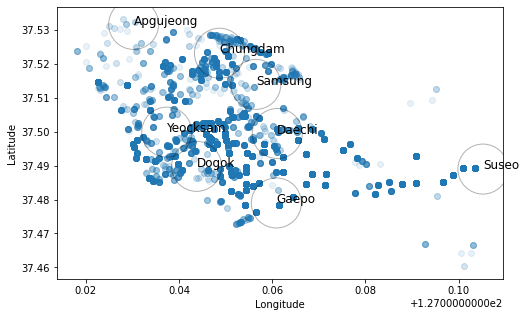

In [18]:
# Location plot (Spatial information)
plt.figure(figsize=(8, 5))
plt.scatter(data1['Longtitude(경도)'],data1['Latitude(위도)'],alpha=0.1) # data plot

for i in range(8): # Marking areas
    plt.text(dong_data['Lng'][i], dong_data['Lat'][i],dong_data['Dong'][i],fontsize=12)
plt.scatter(dong_data['Lng'], dong_data['Lat'], edgecolors='black', c='None', s=2500, alpha=0.3)  
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [19]:
# Changing the names of columns
data2=data1.copy()
data2.columns=['yearqrt', 'price', 'dong','Lat', 'Lng','rate','station_dist']
data2

,yearqrt,price,dong,Lat,Lng,rate,station_dist
0,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
1,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555
...,...,...,...,...,...,...,...
17395,2017Q3,179000.0,청담동,37.526956,127.053126,0.069818,874.719438
17396,2017Q3,122500.0,역삼동,37.496260,127.046404,0.069818,944.717800
17397,2017Q3,64000.0,역삼동,37.491379,127.034880,0.069818,812.764336
17398,2017Q3,170000.0,청담동,37.524675,127.056226,0.069818,717.729425


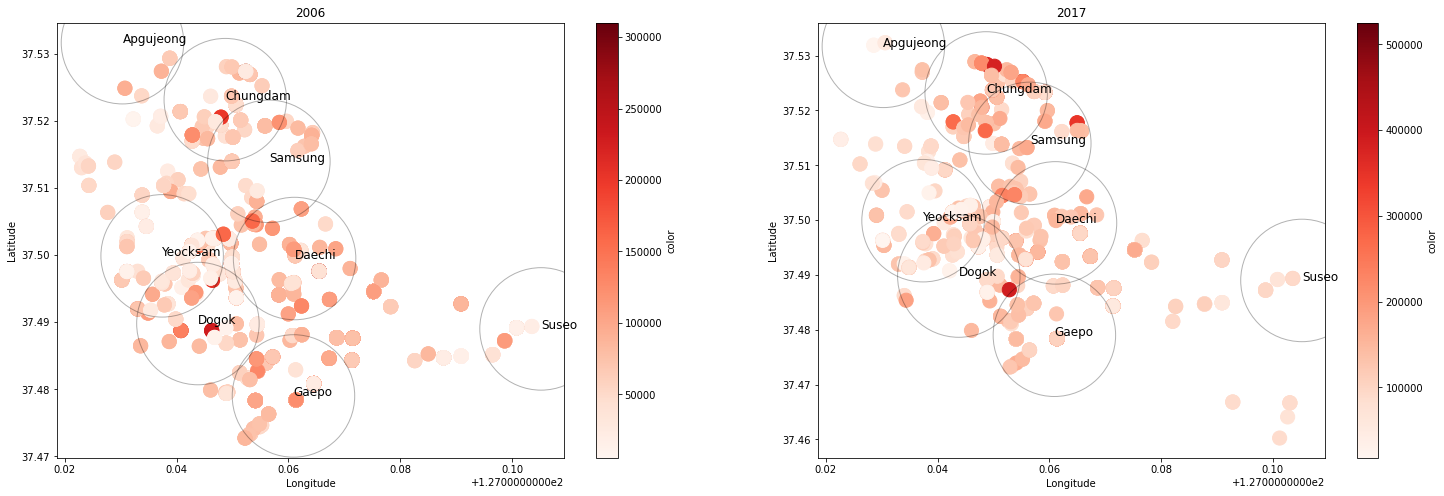

In [20]:
# visualize price at 2006 and 2017
plt.figure(figsize=(25, 8))

tp=data2[data2['yearqrt'].str.contains("2006Q")]
plt.subplot(1,2,1) # price plot
plt.scatter(x=tp["Lng"], y=tp["Lat"], c=tp["price"],s=200, cmap=plt.cm.Reds)
plt.colorbar(label='color')
for i in range(8): # Marking areas
    plt.text(dong_data['Lng'][i], dong_data['Lat'][i],dong_data['Dong'][i],fontsize=12)
plt.scatter(dong_data['Lng'], dong_data['Lat'], edgecolors='black', c='None', s=15000, alpha=0.3)
plt.title("2006"); plt.xlabel("Longitude"); plt.ylabel("Latitude");


tp=data2[data2['yearqrt'].str.contains("2017Q")]
plt.subplot(1,2,2)  # price plot
plt.scatter(x=tp["Lng"], y=tp["Lat"], c=tp["price"], s=200,cmap=plt.cm.Reds)
plt.colorbar(label='color')
for i in range(8): # Marking areas
    plt.text(dong_data['Lng'][i], dong_data['Lat'][i],dong_data['Dong'][i],fontsize=12)
plt.scatter(dong_data['Lng'], dong_data['Lat'], edgecolors='black', c='None', s=15000, alpha=0.3)
plt.title("2017"); plt.xlabel("Longitude"); plt.ylabel("Latitude");

In [21]:
# Slicce Data only dong name is 개포동
data_gaepo=data2[data2['dong']=='개포동']
data_gaepo.head()

,yearqrt,price,dong,Lat,Lng,rate,station_dist
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555
5,2006Q1,56000.0,개포동,37.478407,127.061375,0.152881,1486.178329
6,2006Q1,40500.0,개포동,37.494581,127.075275,0.152881,316.902800


In [22]:
# Group data by yyyyqrt
data_gaepo_time=data_gaepo.groupby('yearqrt').mean()  
data_gaepo_time.head()

,price,Lat,Lng,rate,station_dist
yearqrt,,,,,
2006Q1,66954.968288,37.483163,127.063829,0.152881,1106.719865
2006Q2,69240.408163,37.484935,127.066870,0.430146,1009.206136
2006Q3,71064.128440,37.484071,127.063688,0.367231,1060.919660
2006Q4,86538.140704,37.484502,127.065871,0.624673,1033.040965
2007Q1,79064.285714,37.487090,127.068583,0.100708,846.666678


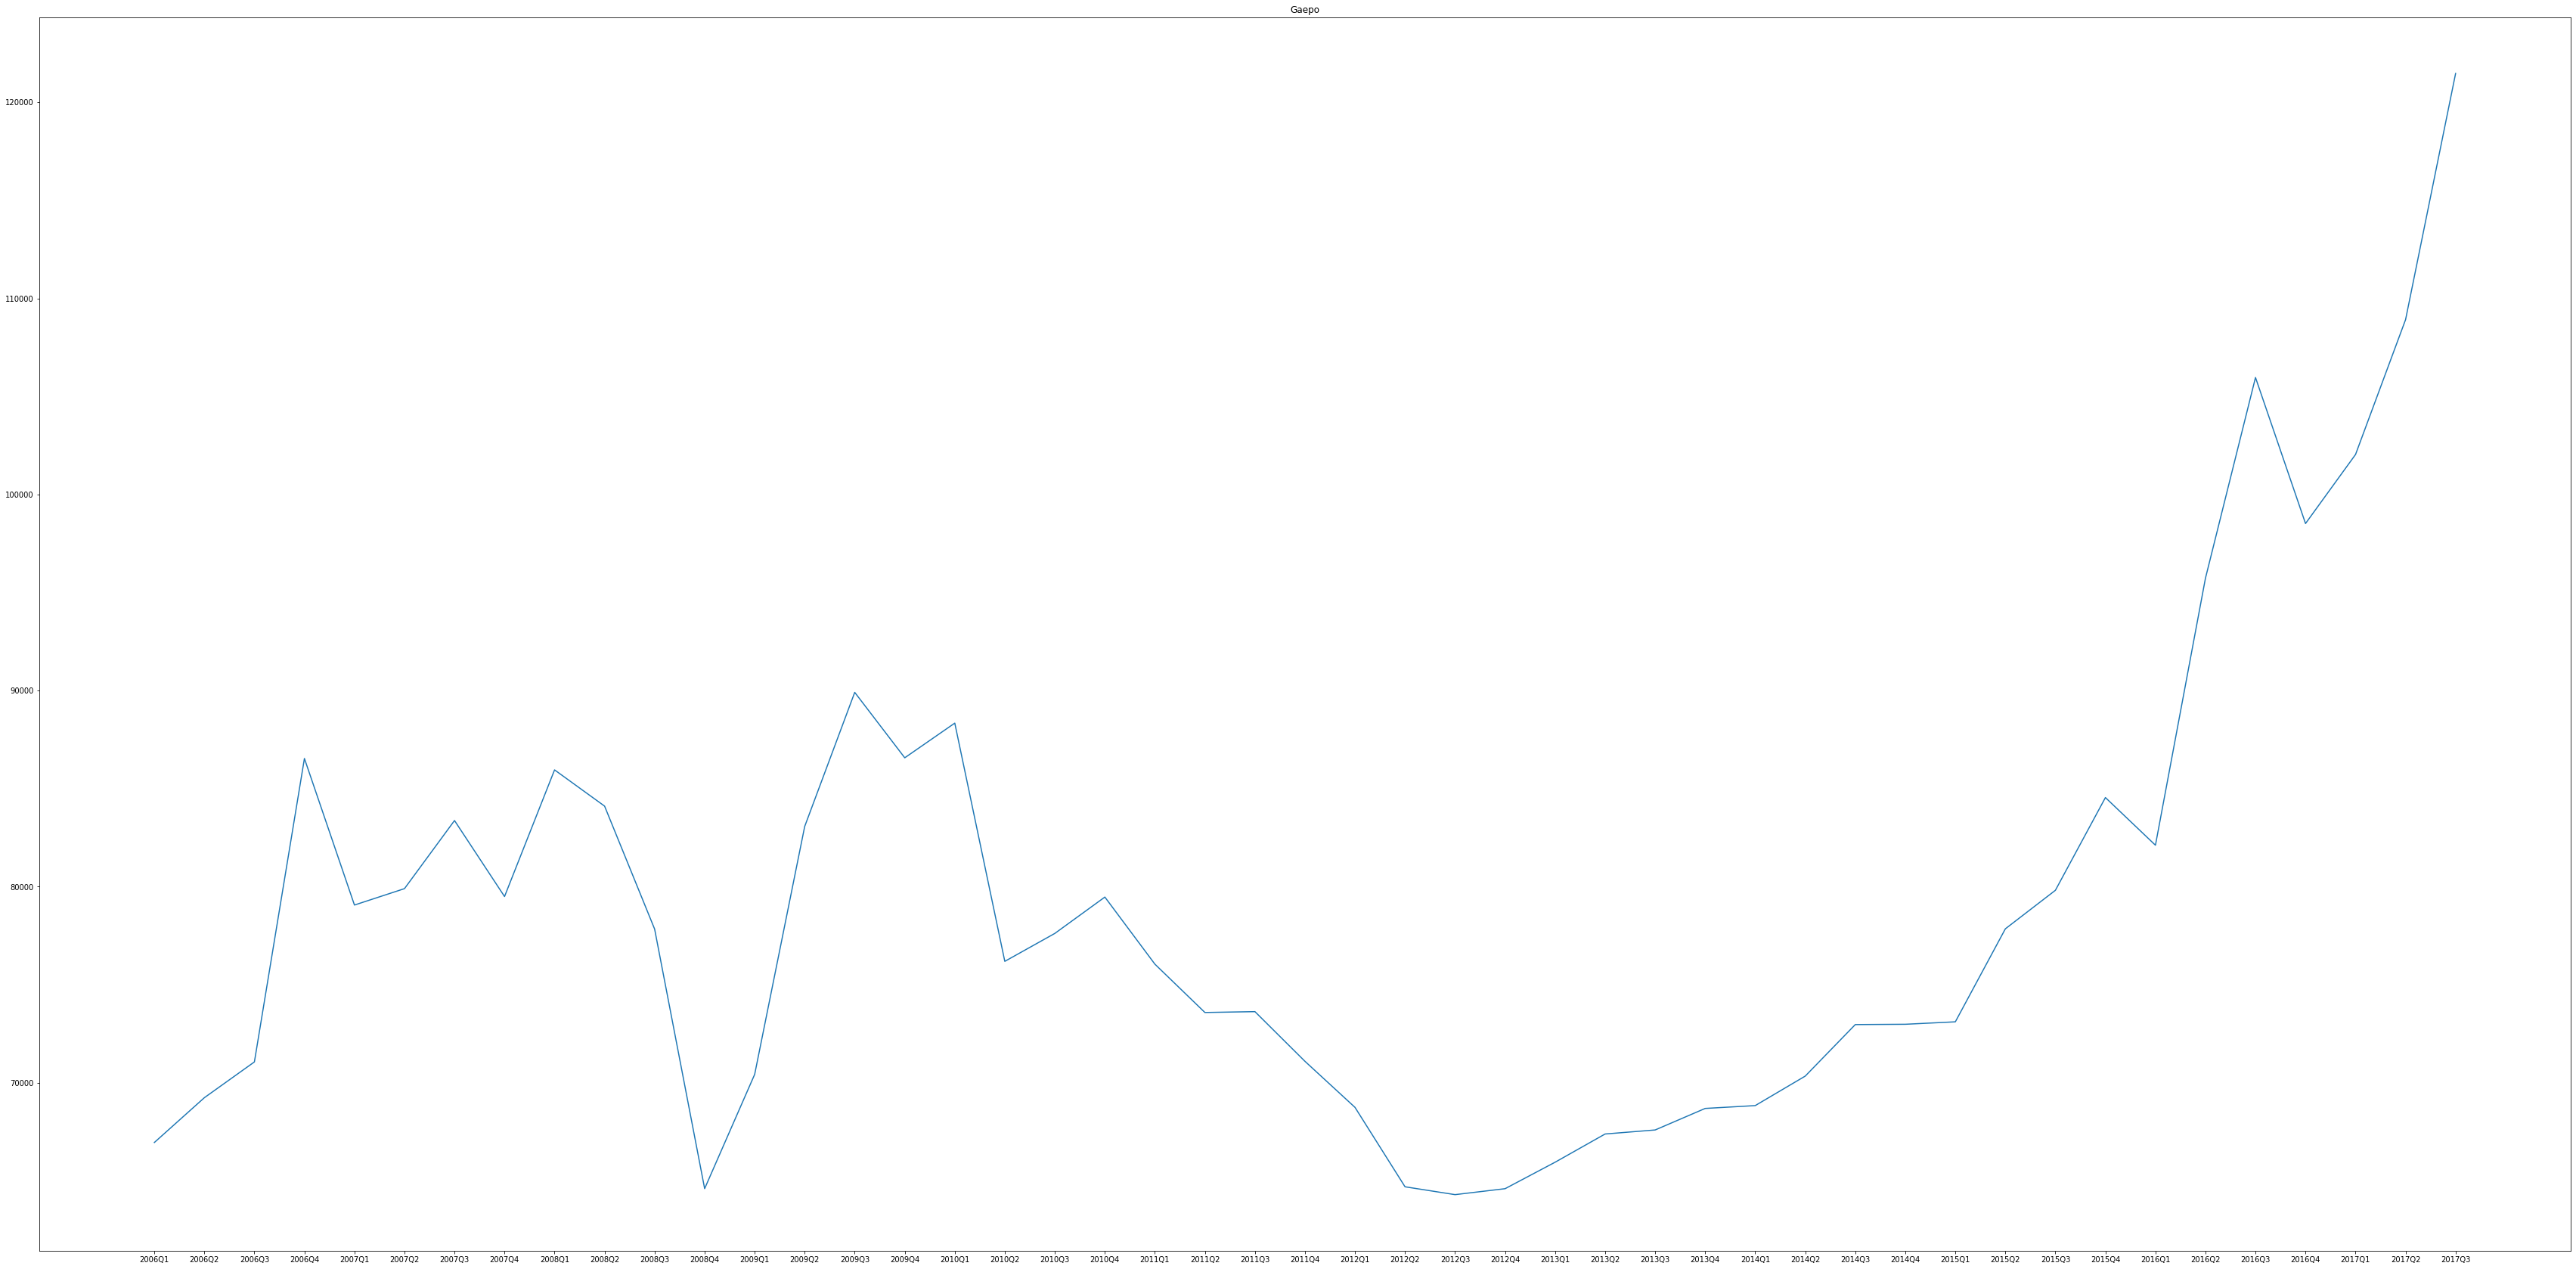

In [23]:
plt.figure(figsize=(60,30))
plt.title("Gaepo")

# Show 개포동 price change over time graph
plt.plot(data_gaepo_time['price'])
plt.show()

## Exercise(3) - Each Dong's Average Price Changes Over Time

In [24]:
#for Korean Class (printing korean words)
import matplotlib.font_manager as fm

# print korean fonts that you have
# font_list = [font.name for font in fm.fontManager.ttflist]
#print(font_list)
plt.rcParams['font.family'] = 'D2Coding'

import matplotlib # For broken '-' sign
matplotlib.rcParams['axes.unicode_minus'] = False

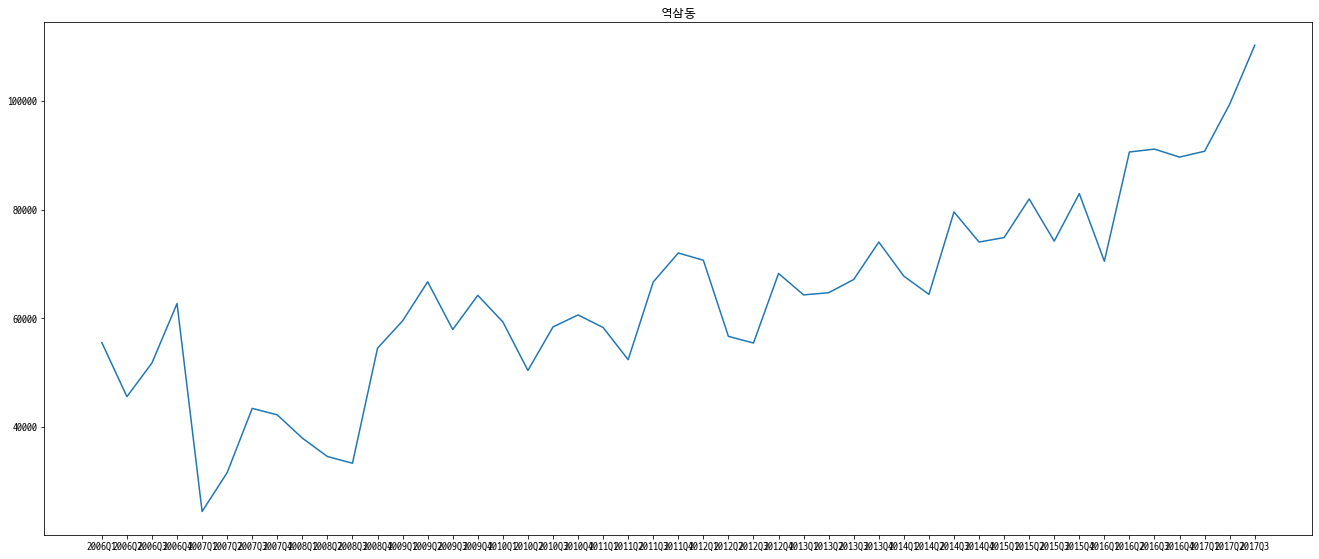

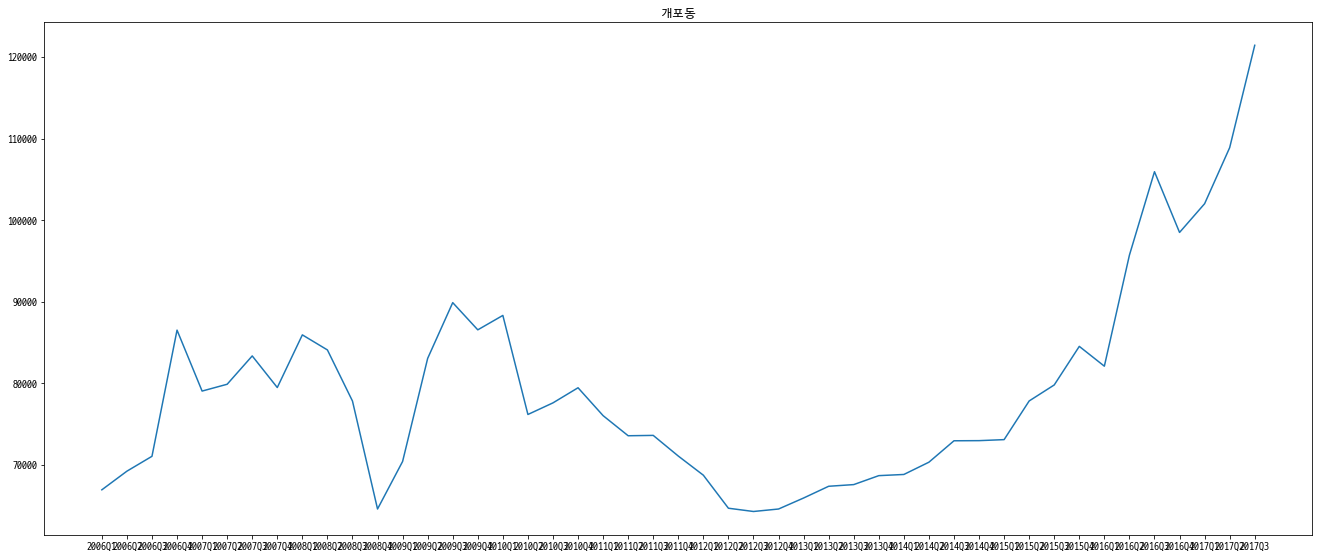

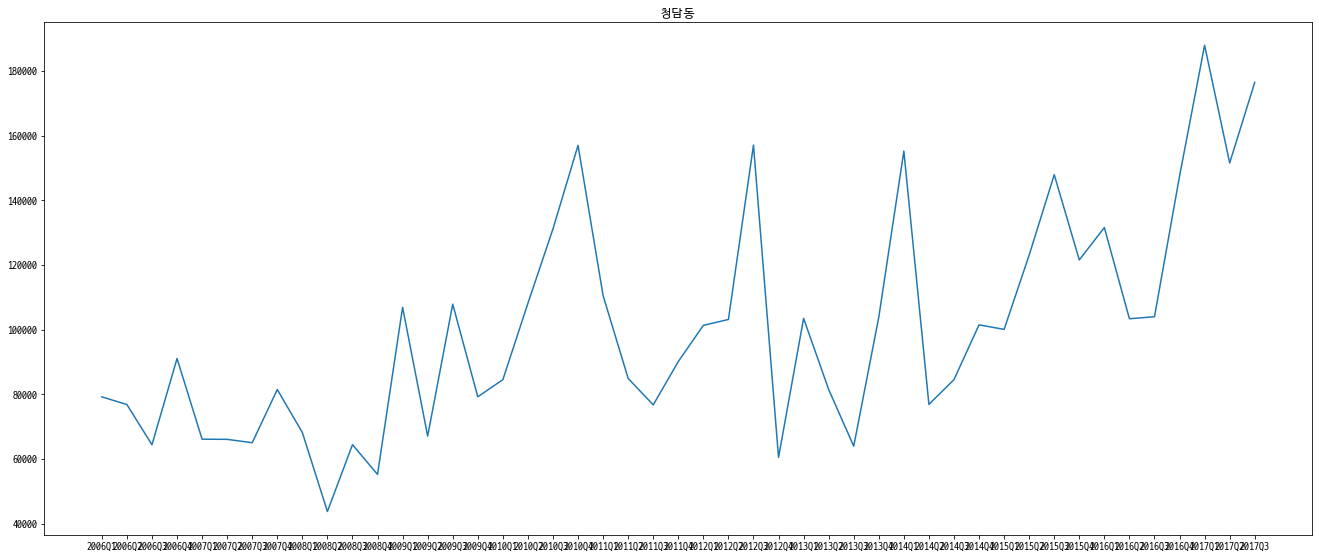

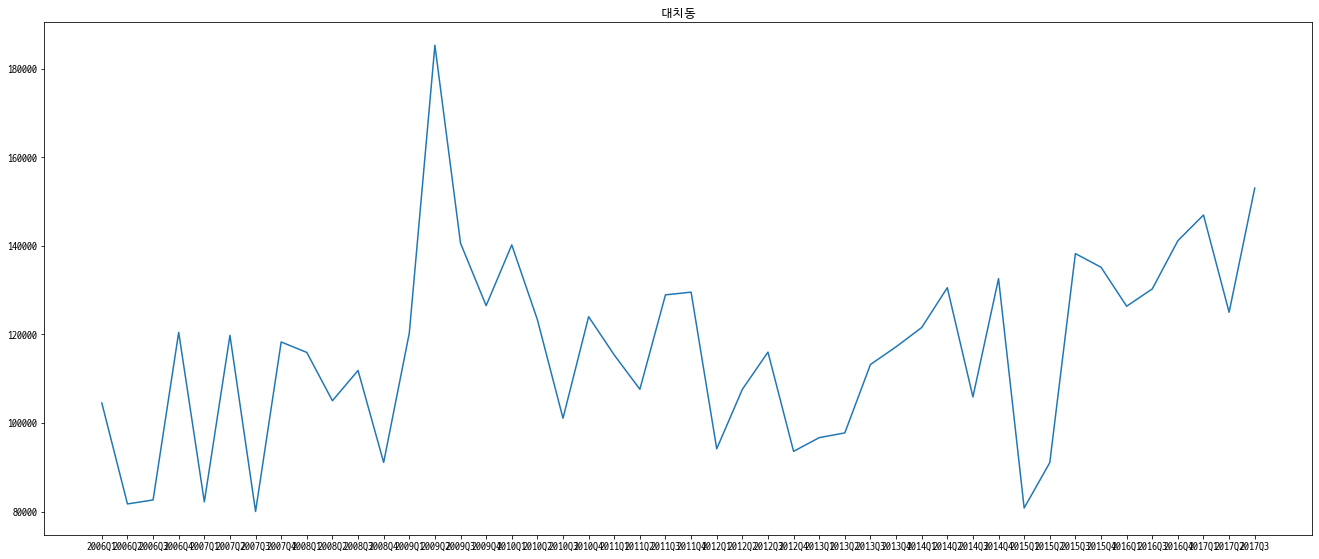

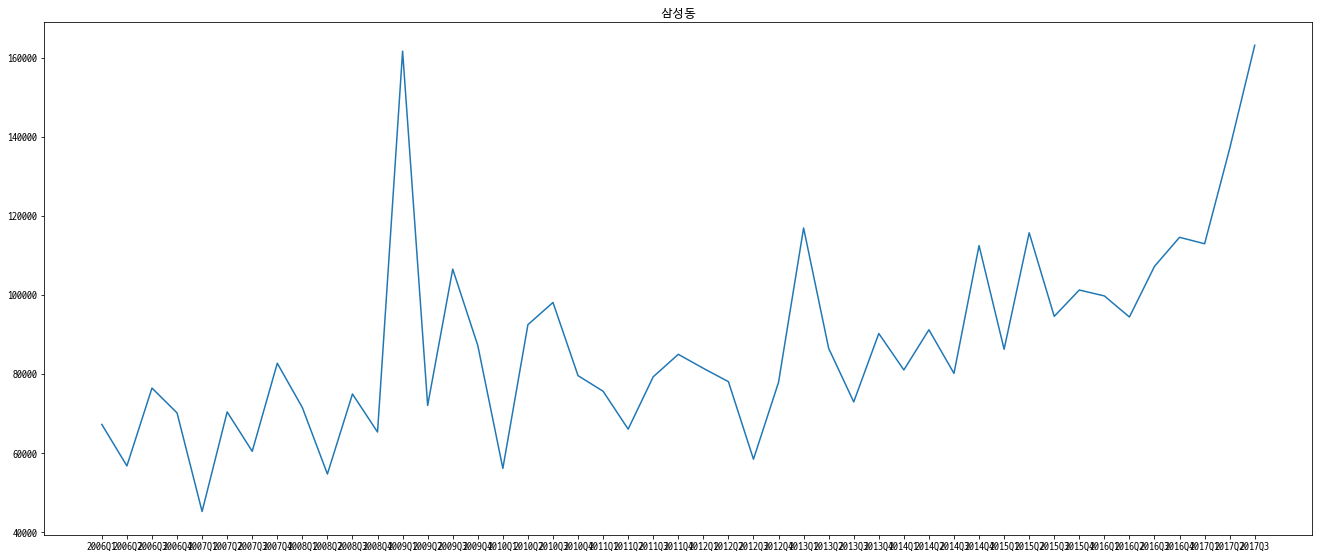

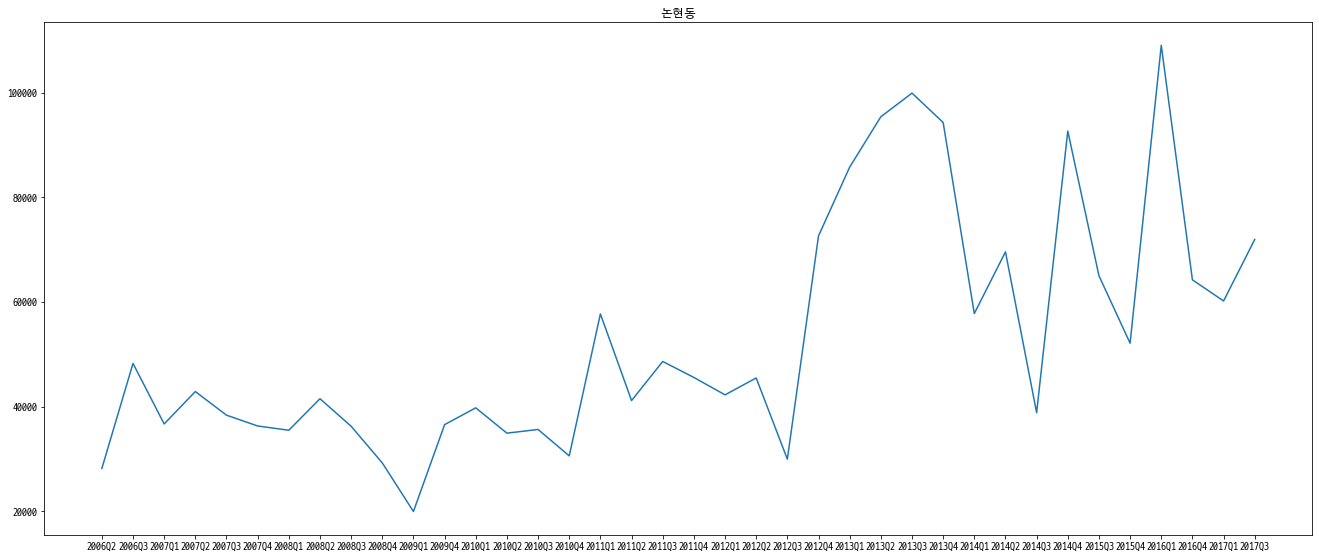

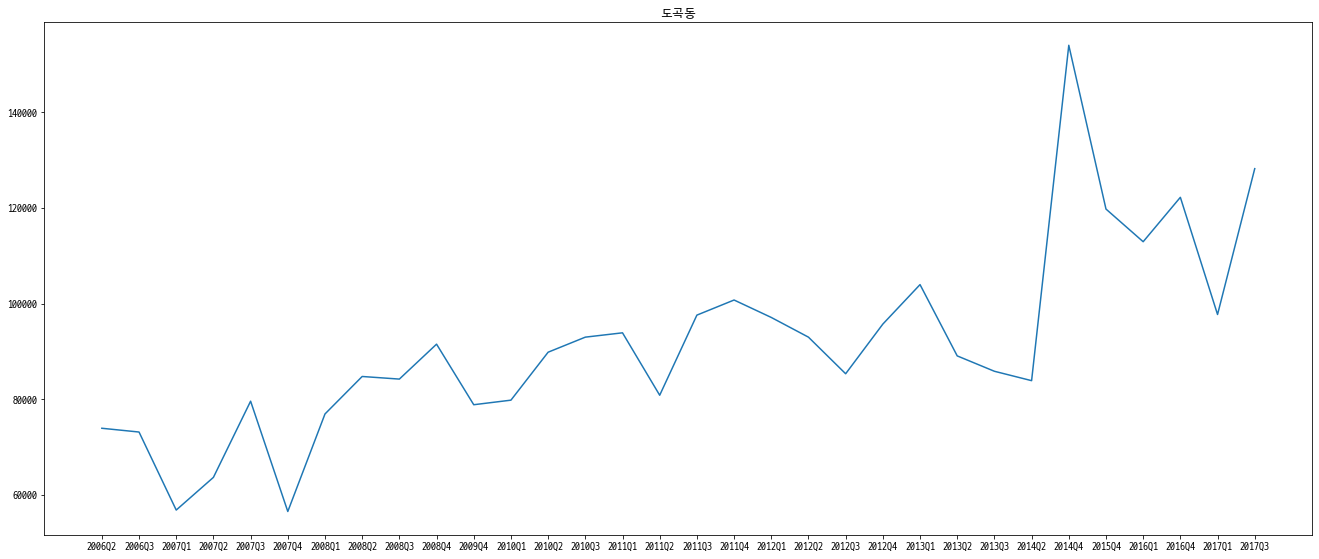

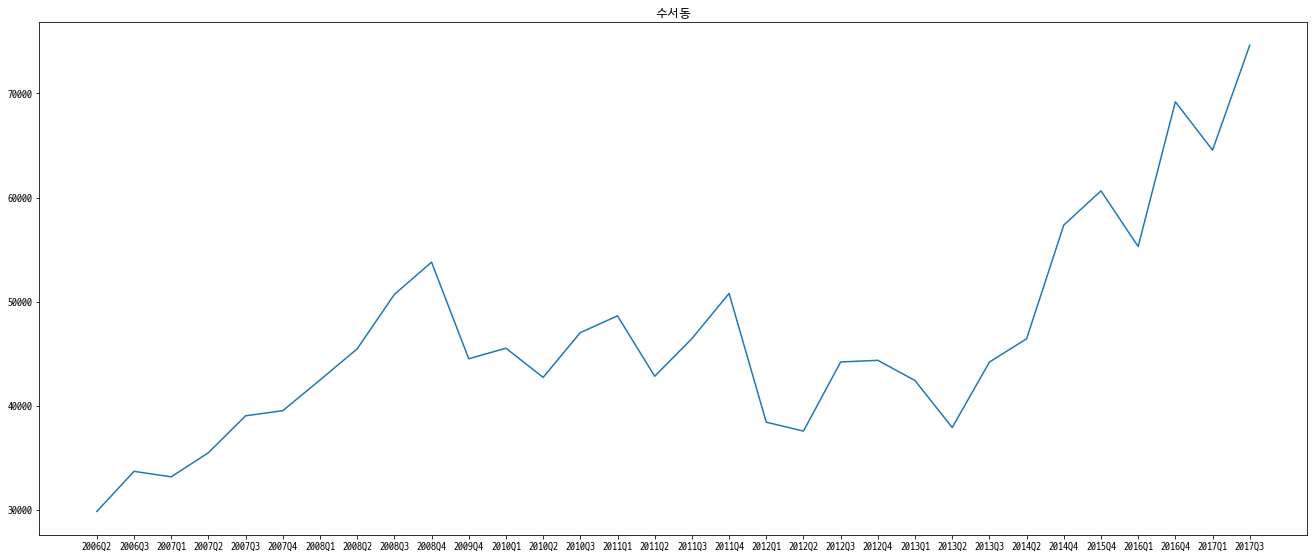

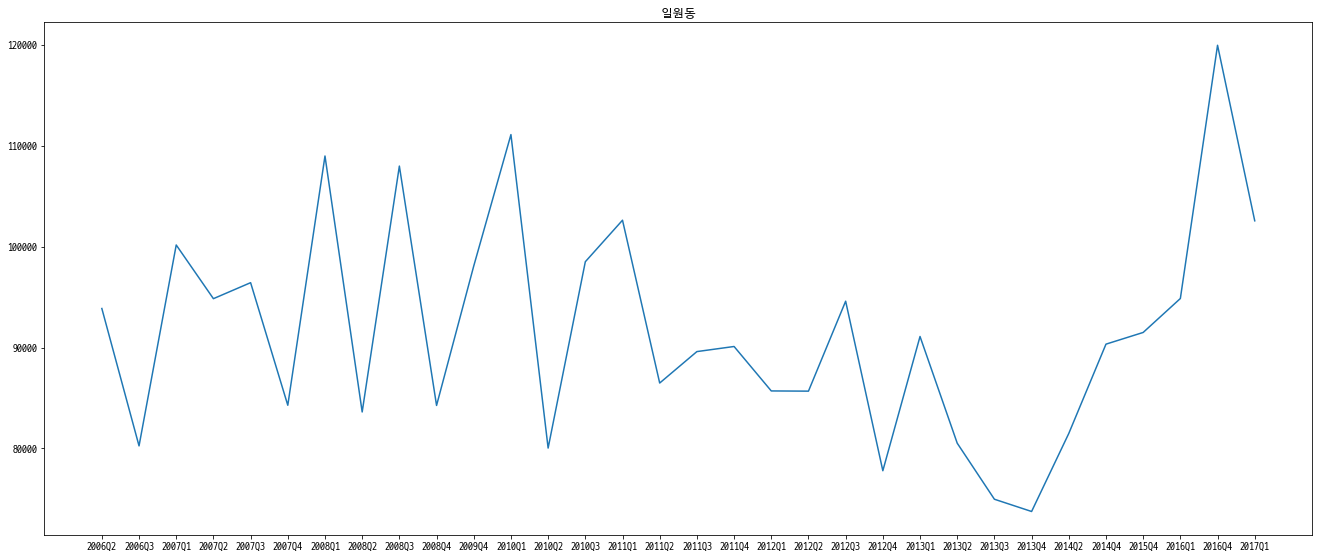

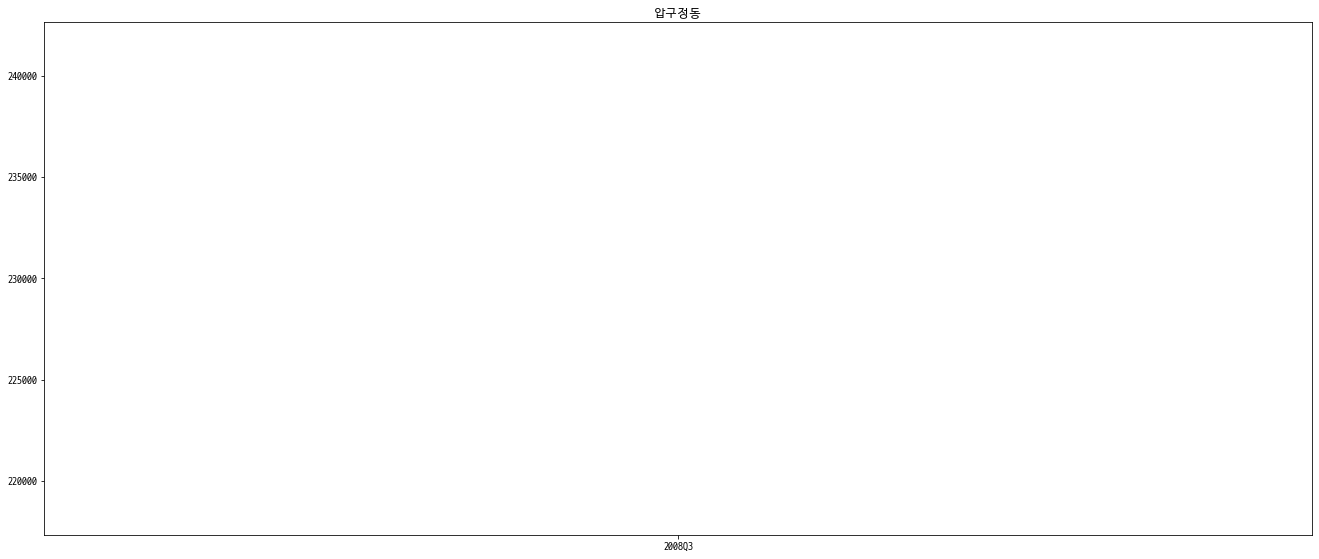

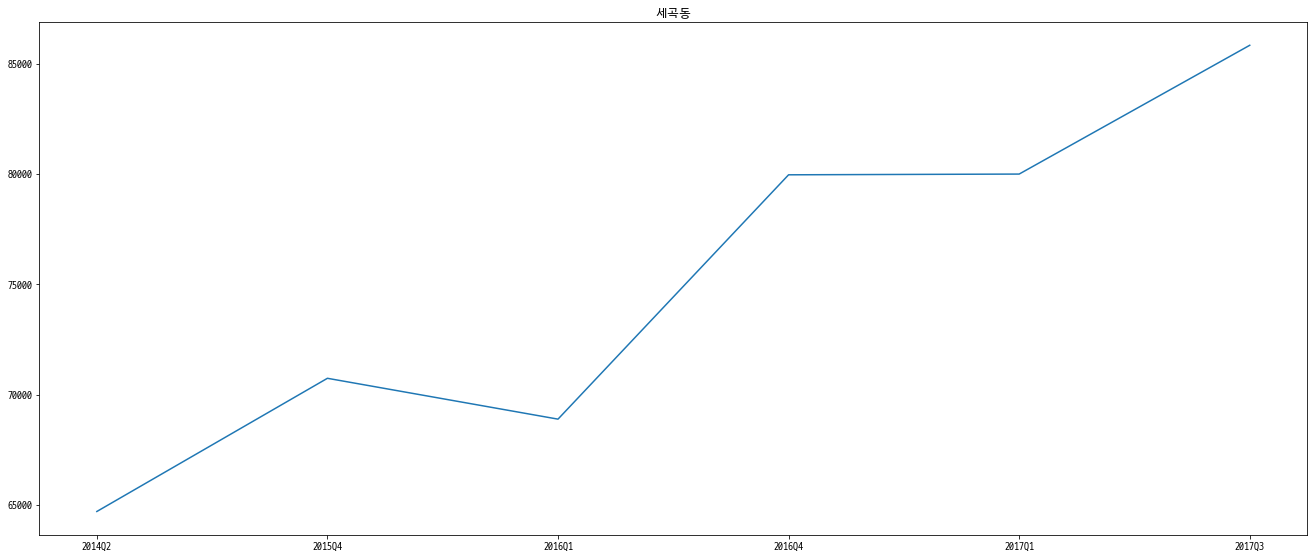

In [25]:
# Extract only dong name
dong=df['dong(동)'].unique()

count=1

# Show a graph by dong
for i in dong:
    plt.figure(figsize=(50,100))
    data_do=data2[data2['dong']==i]
    data_do_time=data_do.groupby('yearqrt').mean() 
    plt.subplot(9,2, count) 
    plt.title(i)
    plt.plot(data_do_time['price'])
    
    plt.show()
    
    count=count+1
plt.show()

## Exercise(4) - Simple Smoothing Using 5-MA

In [26]:
dong_col=[]
for i in dong:
    tmp=df[df['dong(동)']==i]
    tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean()
    print(i, ' : ', len(tp), end=' ')
    dong_col.append(i)
    print('\n')

역삼동  :  47 

개포동  :  47 

청담동  :  47 

대치동  :  46 

삼성동  :  47 

논현동  :  38 

도곡동  :  32 

수서동  :  32 

일원동  :  32 

압구정동  :  1 

세곡동  :  6 



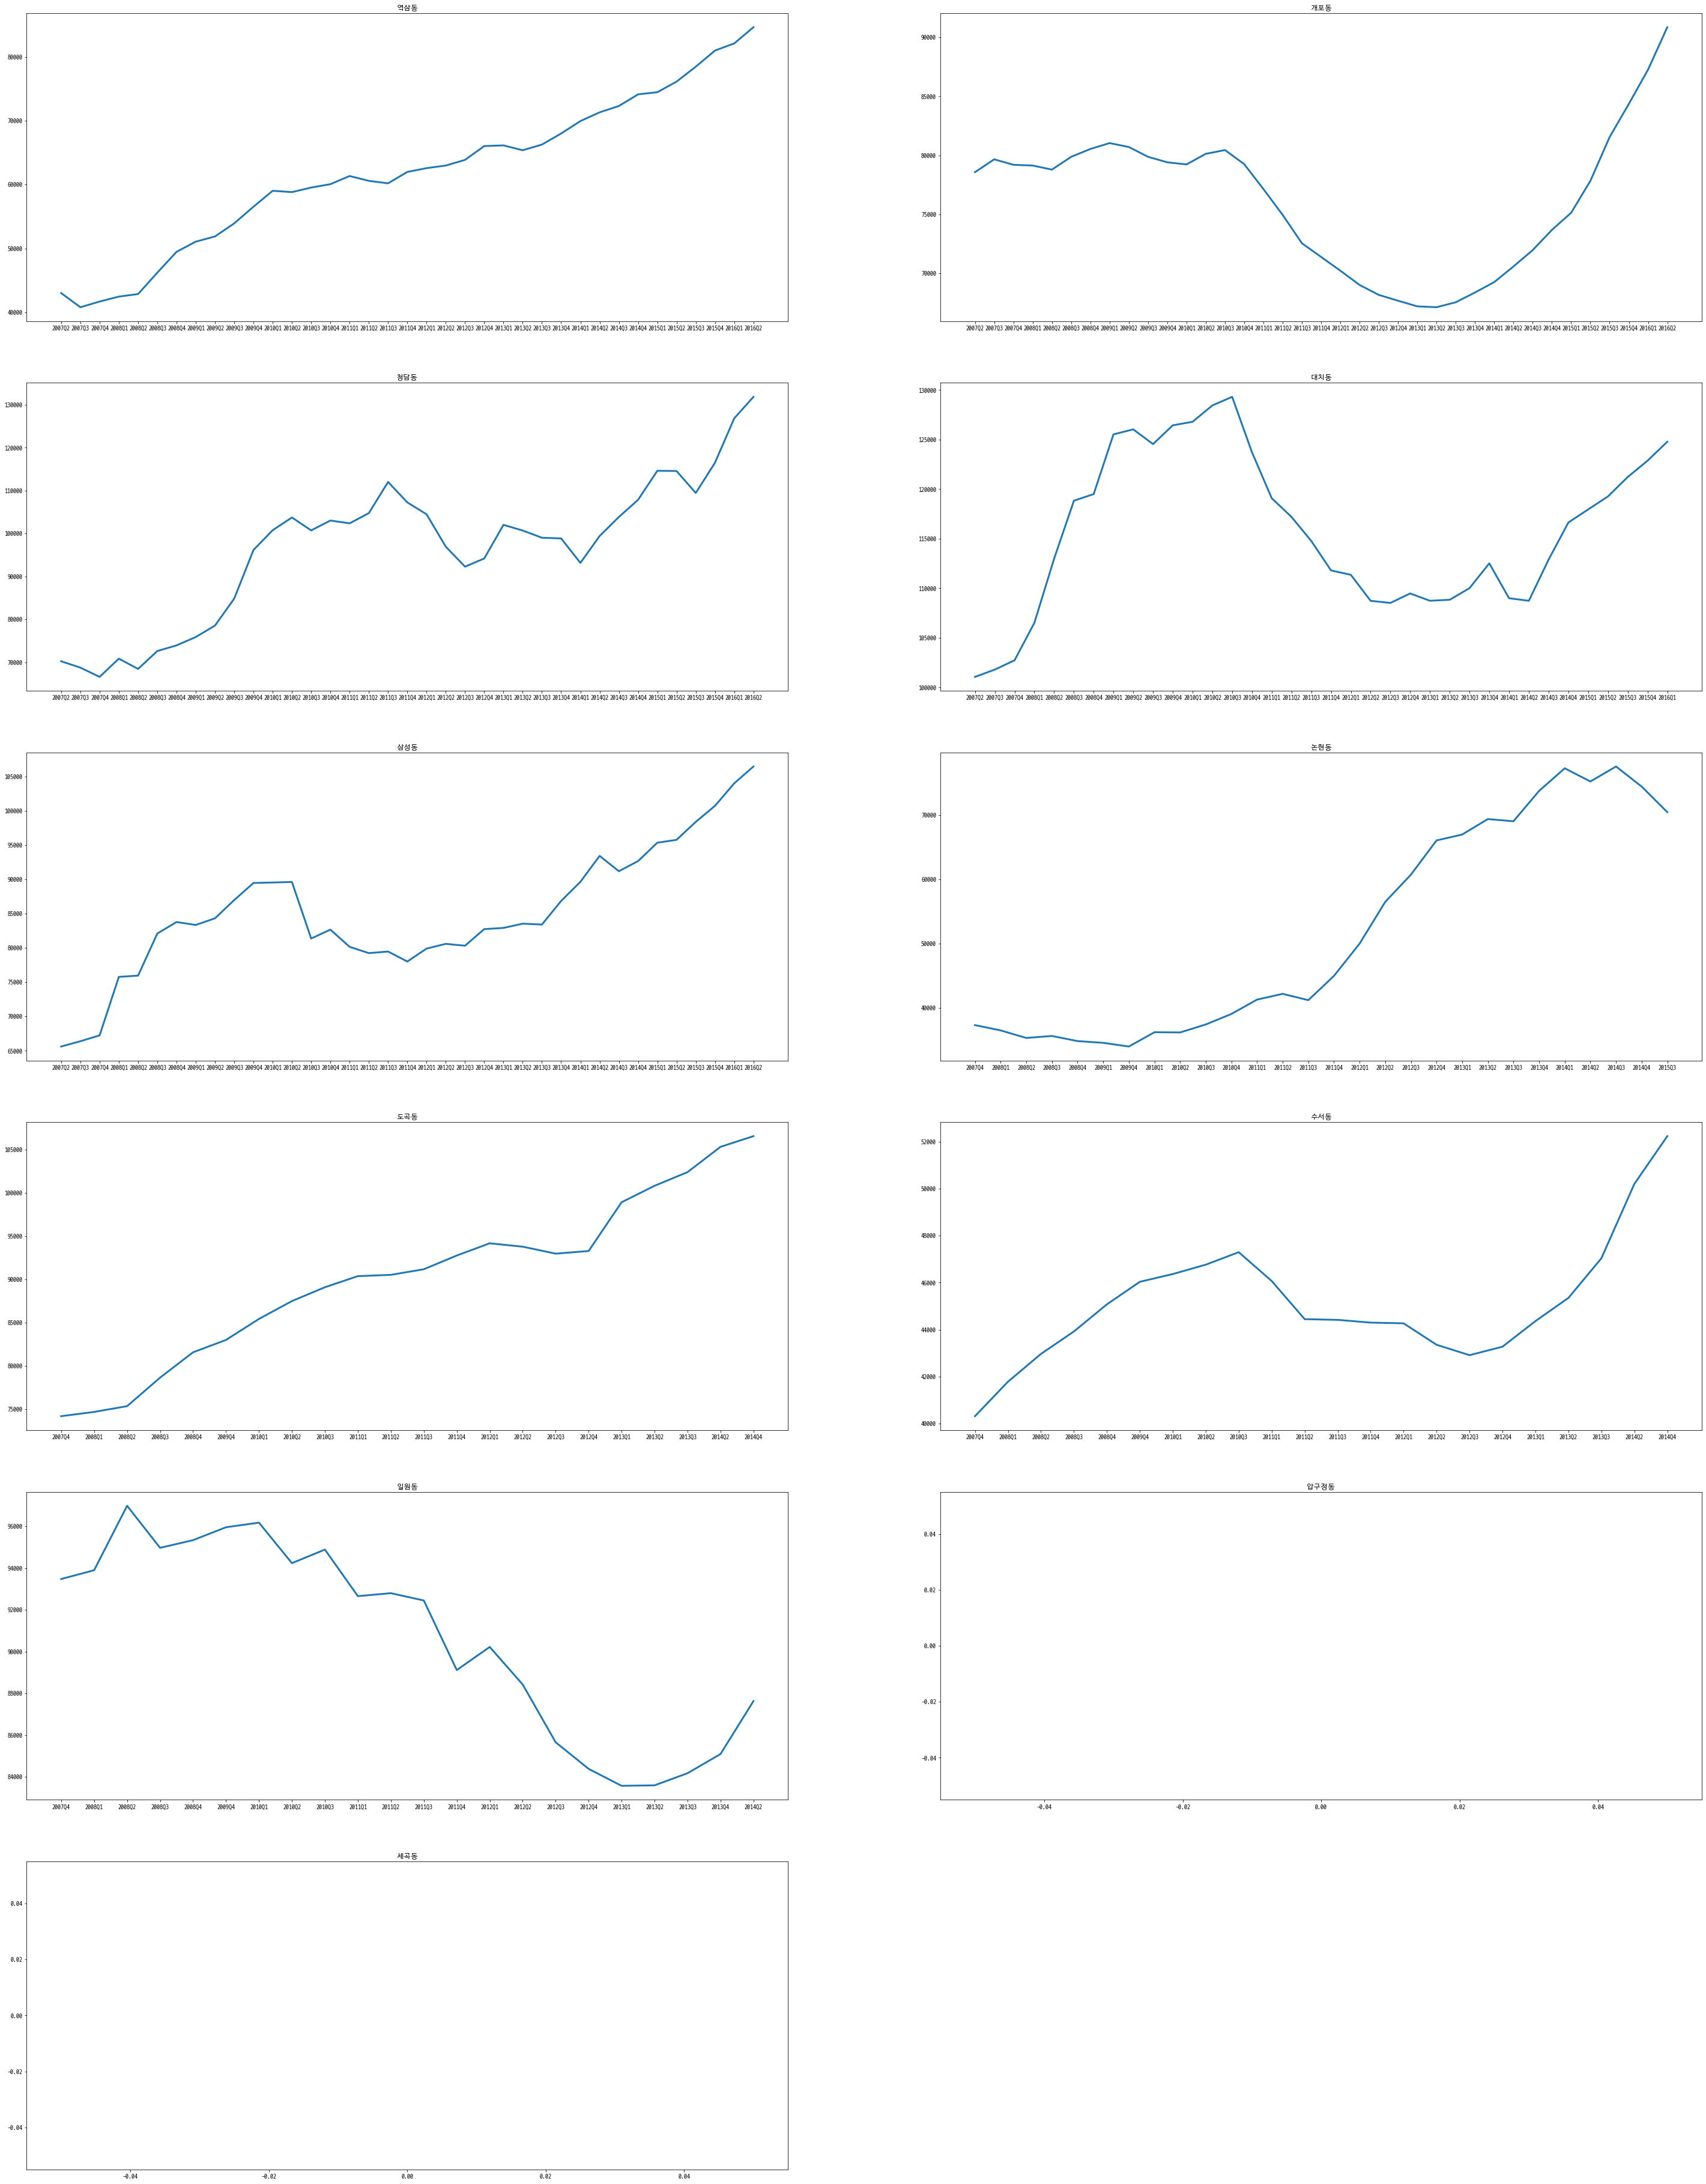

In [27]:
plt.figure(figsize=(50,100))
count=1; date=[];
nMA = 5 # number of Pre(or post) samples to average


for i in dong:
    data_do=data2[data2['dong']==i]
    data_do_time=data_do.groupby('yearqrt').mean()
   
    
     
    
    # Simple Smoothing using 5MA
    ls=[]
    for j in range(nMA,len(data_do_time)-nMA): # Averaging 5 samples
        ls.append(data_do_time['price'].iloc[j-nMA:j+nMA].mean())
    plt.subplot(9,2, count)
    plt.title(i)
    df_mean5=pd.DataFrame({"Time" : data_do_time.index.values[nMA:len(data_do_time)-nMA], "Mean_Price" : ls })
    plt.plot(df_mean5["Time"],df_mean5["Mean_Price"],linewidth=3.0)
    

    count=count+1

In [28]:
# import for time series prediction 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
corr=df.corr()
corr.head(15)

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
price(가격),1.000000,0.085364,0.711187,0.094599,0.105059,-0.079797,0.289566,-0.132575,-0.044081,-0.016064,...,-0.027211,-0.023917,0.032413,0.148241,0.117208,0.077838,-0.181609,-0.265625,0.189604,0.099194
con_year(건축년도),0.085364,1.000000,0.439237,0.390900,0.528441,-0.428207,0.017524,0.018824,0.003777,0.064364,...,-0.567171,0.192700,-0.375835,0.427227,-0.727402,-0.613206,0.513935,0.425801,0.608765,0.382408
area(면적),0.711187,0.439237,1.000000,0.185766,0.434611,-0.238154,0.112332,-0.063985,-0.049426,0.073215,...,-0.351692,0.039753,-0.231797,0.146997,-0.350279,-0.382750,0.102846,0.104173,0.346106,0.222335
floor(층수),0.094599,0.390900,0.185766,1.000000,0.162481,-0.162969,-0.005394,-0.014200,-0.032827,0.096666,...,-0.334654,0.119266,-0.262416,0.206511,-0.356595,-0.414505,0.456448,0.136747,0.621011,0.563960
Latitude(위도),0.105059,0.528441,0.434611,0.162481,1.000000,-0.439299,0.025258,-0.002774,-0.006517,0.039514,...,-0.552484,0.034464,-0.446530,0.129443,-0.429316,-0.454962,0.338806,0.406034,0.276134,0.195107
Longtitude(경도),-0.079797,-0.428207,-0.238154,-0.162969,-0.439299,1.000000,-0.048094,0.048237,-0.004806,0.017940,...,0.167502,-0.048959,-0.058008,-0.271771,0.188727,0.170895,-0.366380,-0.348238,-0.300691,-0.174684
gdp,0.289566,0.017524,0.112332,-0.005394,0.025258,-0.048094,1.000000,-0.377111,-0.213939,0.149208,...,0.013588,0.020654,0.094657,0.114109,0.060891,0.066403,-0.055760,-0.071899,0.026570,-0.031165
e_grwth(경제성장률),-0.132575,0.018824,-0.063985,-0.014200,-0.002774,0.048237,-0.377111,1.000000,0.432165,-0.179790,...,-0.025769,0.008726,-0.069559,-0.085838,-0.052561,-0.031194,0.031346,0.058049,-0.030690,0.000478
Seoul_l.rate(지가상승률),-0.044081,0.003777,-0.049426,-0.032827,-0.006517,-0.004806,-0.213939,0.432165,1.000000,-0.222397,...,0.035069,0.037458,0.026834,-0.018571,-0.002431,0.036049,-0.007554,0.016848,-0.045749,-0.035941
house_rate(담보대출금리),-0.016064,0.064364,0.073215,0.096666,0.039514,0.017940,0.149208,-0.179790,-0.222397,1.000000,...,-0.123207,-0.012885,-0.129616,0.021558,-0.054156,-0.114287,0.053974,-0.005683,0.123546,0.120198


## Exercise(5) - Correlations 

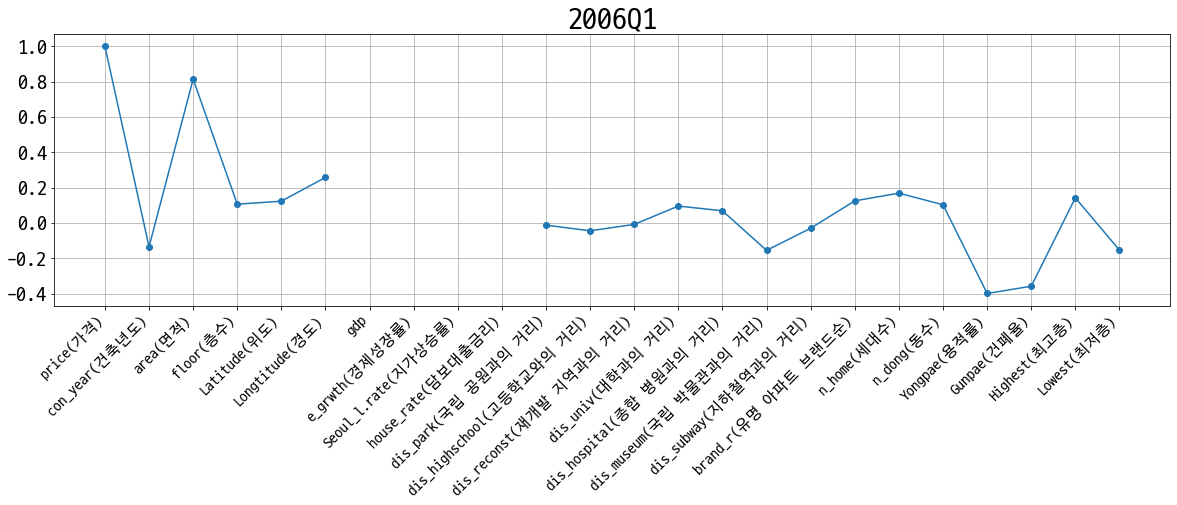

In [29]:
# Correlation in 2006Q1
plt.rcParams["font.family"] = "D2Coding"
matplotlib.rcParams['axes.unicode_minus'] =False

df2006Q1=df[df['yyyyqrt(거래년도 분기별)']== '2006Q1'] # extract data in 2006Q1
df2006Q1_apt=df2006Q1.groupby('aptnm(아파트 이름)').mean() #average price
r = df2006Q1_apt.corr()
r_price = r['price(가격)']

plt.figure(figsize=(20,5))
plt.plot(r_price,'o-')
plt.yticks(fontsize = 20); 
plt.xticks(rotation=45, fontsize = 15, ha = 'right')
plt.title('2006Q1',fontsize=30); 
plt.grid(True)
plt.show()

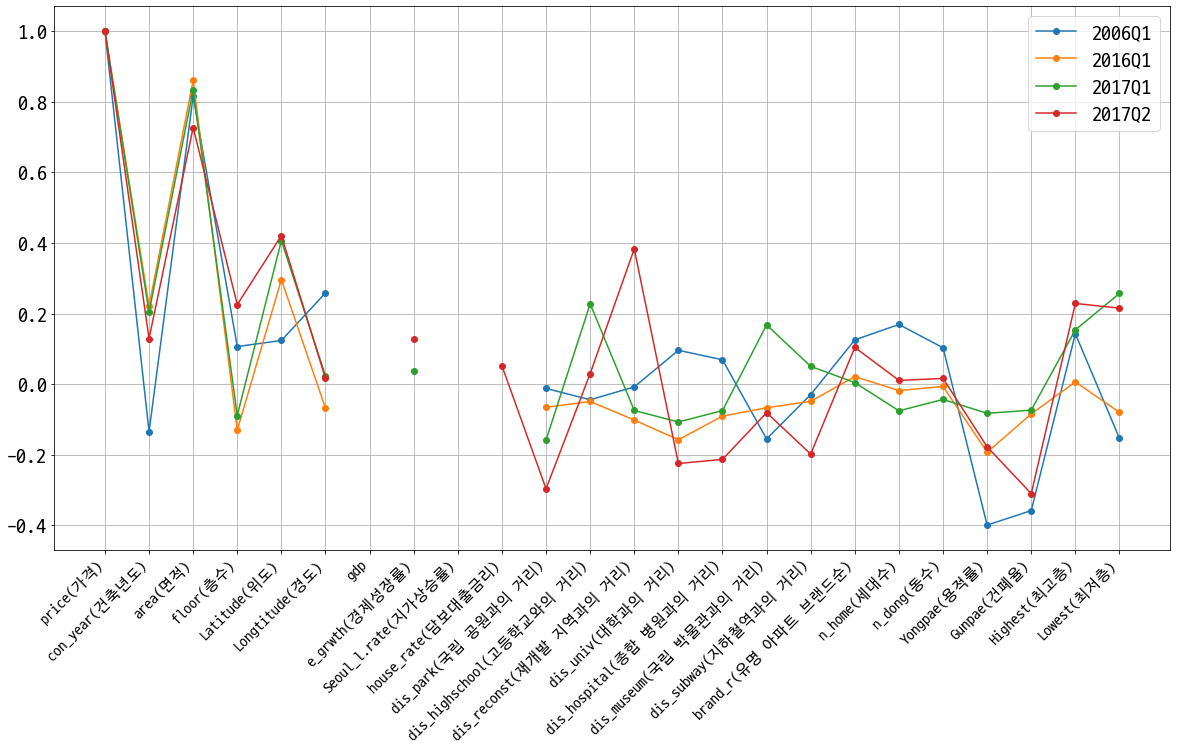

In [30]:
# Correlations in other years.
plt.rcParams["font.family"] = "D2Coding"
matplotlib.rcParams['axes.unicode_minus'] =False
years = ['2006Q1', '2016Q1', '2017Q1', '2017Q2']

for y in years:
    df_y=df[df['yyyyqrt(거래년도 분기별)']==y] # extract each data in year
    df_y_apt=df_y.groupby('aptnm(아파트 이름)').mean() #average price
    df_r = df_y_apt.corr()
    df_r_price = df_r['price(가격)']
    if y==years[0]:
        df_r_price_all = df_r_price
    else:
        df_r_price_all = pd.concat([df_r_price_all,df_r_price],axis=1)
df_r_price_all.columns = years


plt.figure(figsize=(20,10))
plt.plot(df_r_price_all,'o-')
plt.yticks(fontsize=20); plt.xticks(rotation=45, fontsize = 15, ha = 'right')
plt.grid(True)
plt.legend(years, fontsize=20)
plt.show()

## Exercise(6) - AR(1) 

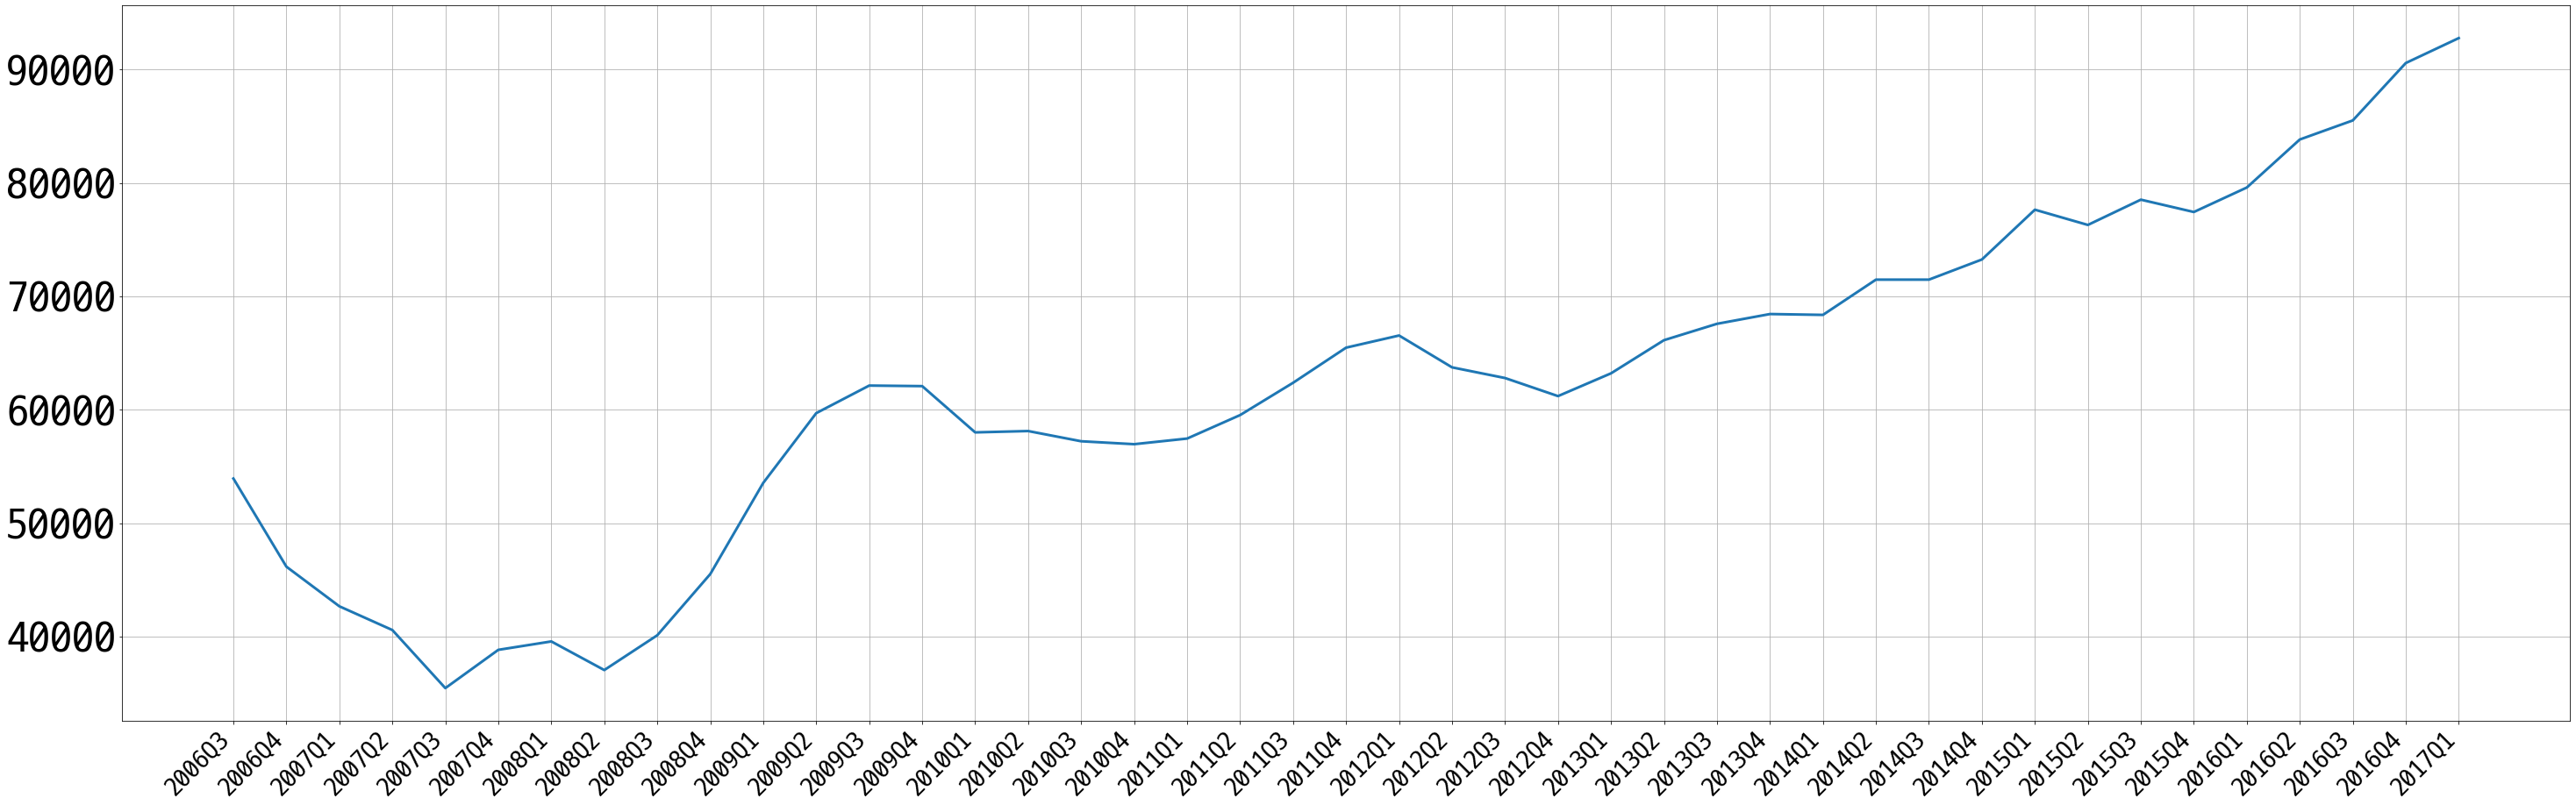

In [31]:
nMA = 2 # number of Pre(or post) samples to average

plt.figure(figsize=(50,15))
# Extract datat only 역삼동
tmp=df[df['dong(동)']=="역삼동"]
tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean().copy()
ls=[]
for j in range(nMA,len(tp)-nMA):
    ls.append(tp['price(가격)'].iloc[j-nMA:j+nMA].mean())
df_mean5=pd.DataFrame({"Time" : tp.index.values[nMA:len(tp)-nMA], "Mean_Price" : ls })
plt.plot(df_mean5["Time"],df_mean5["Mean_Price"],linewidth=3.0)
plt.yticks(fontsize = 50); plt.xticks(fontsize = 30, rotation = 45, ha = 'right')
plt.grid(True)

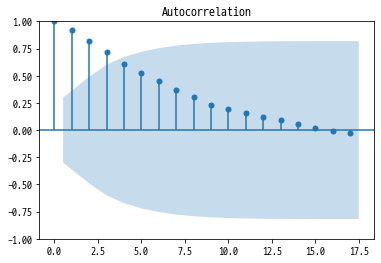

In [32]:
plot_acf(df_mean5['Mean_Price'])
plt.show()

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


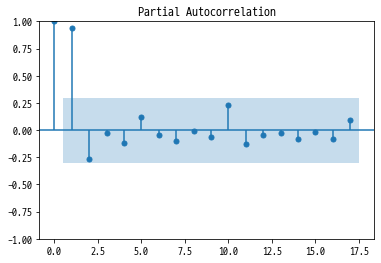

In [33]:
plot_pacf(df_mean5['Mean_Price'])
plt.show()

## Exercise(6) - AR(1) ; Optional?

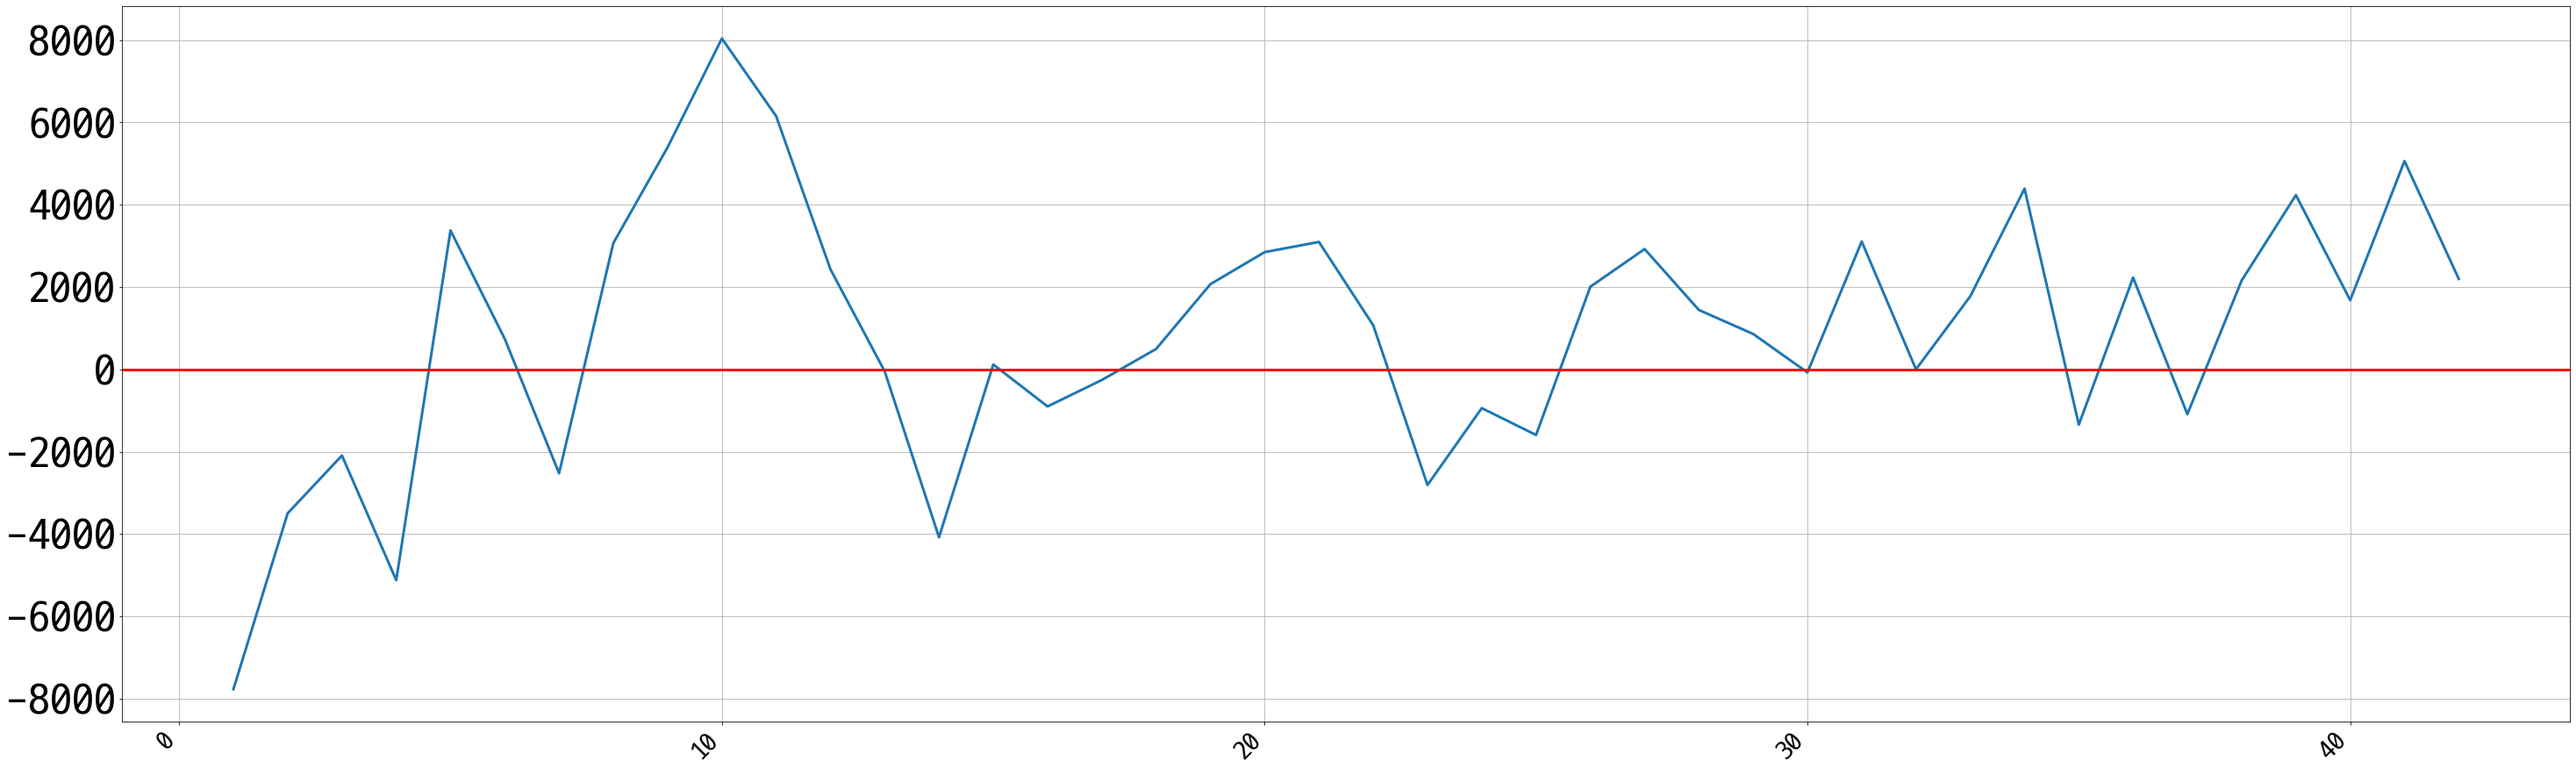

In [34]:
# Difference
plt.figure(figsize=(50,15))

diff_1 = df_mean5['Mean_Price'].diff()

plt.yticks(fontsize = 50); plt.xticks(fontsize = 30, rotation = 45, ha = 'right')
plt.plot(diff_1,  linewidth=3.0)
plt.axhline(y=0, color='r', linewidth=3.0)
plt.grid(True)

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


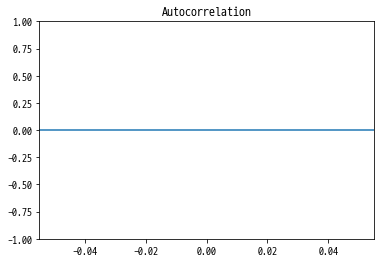

In [35]:
plot_acf(diff_1)
plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api

train = diff_1.iloc[:38] # 38 out of 42 samples
test = diff_1.iloc[38:] # 4 out of 42 samples

model = ARIMA(train, order= (1,0,0)) # order=(p,d,q), here we only use  p = 1

# Nc: No constant used / convergence information is not printed
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Mean_Price   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -345.980
Date:                Sat, 09 Apr 2022   AIC                            697.959
Time:                        20:45:42   BIC                            702.872
Sample:                             0   HQIC                           699.707
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        602.1585    865.986      0.695      0.487   -1095.143    2299.460
ar.L1          0.4980      0.141      3.543      0.000       0.222       0.773
sigma2      7.716e+06   1.96e+06      3.929      0.0

In [54]:
# plot the result (predicted value and true value) for traing samples
predict = model_fit.plot_predict()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

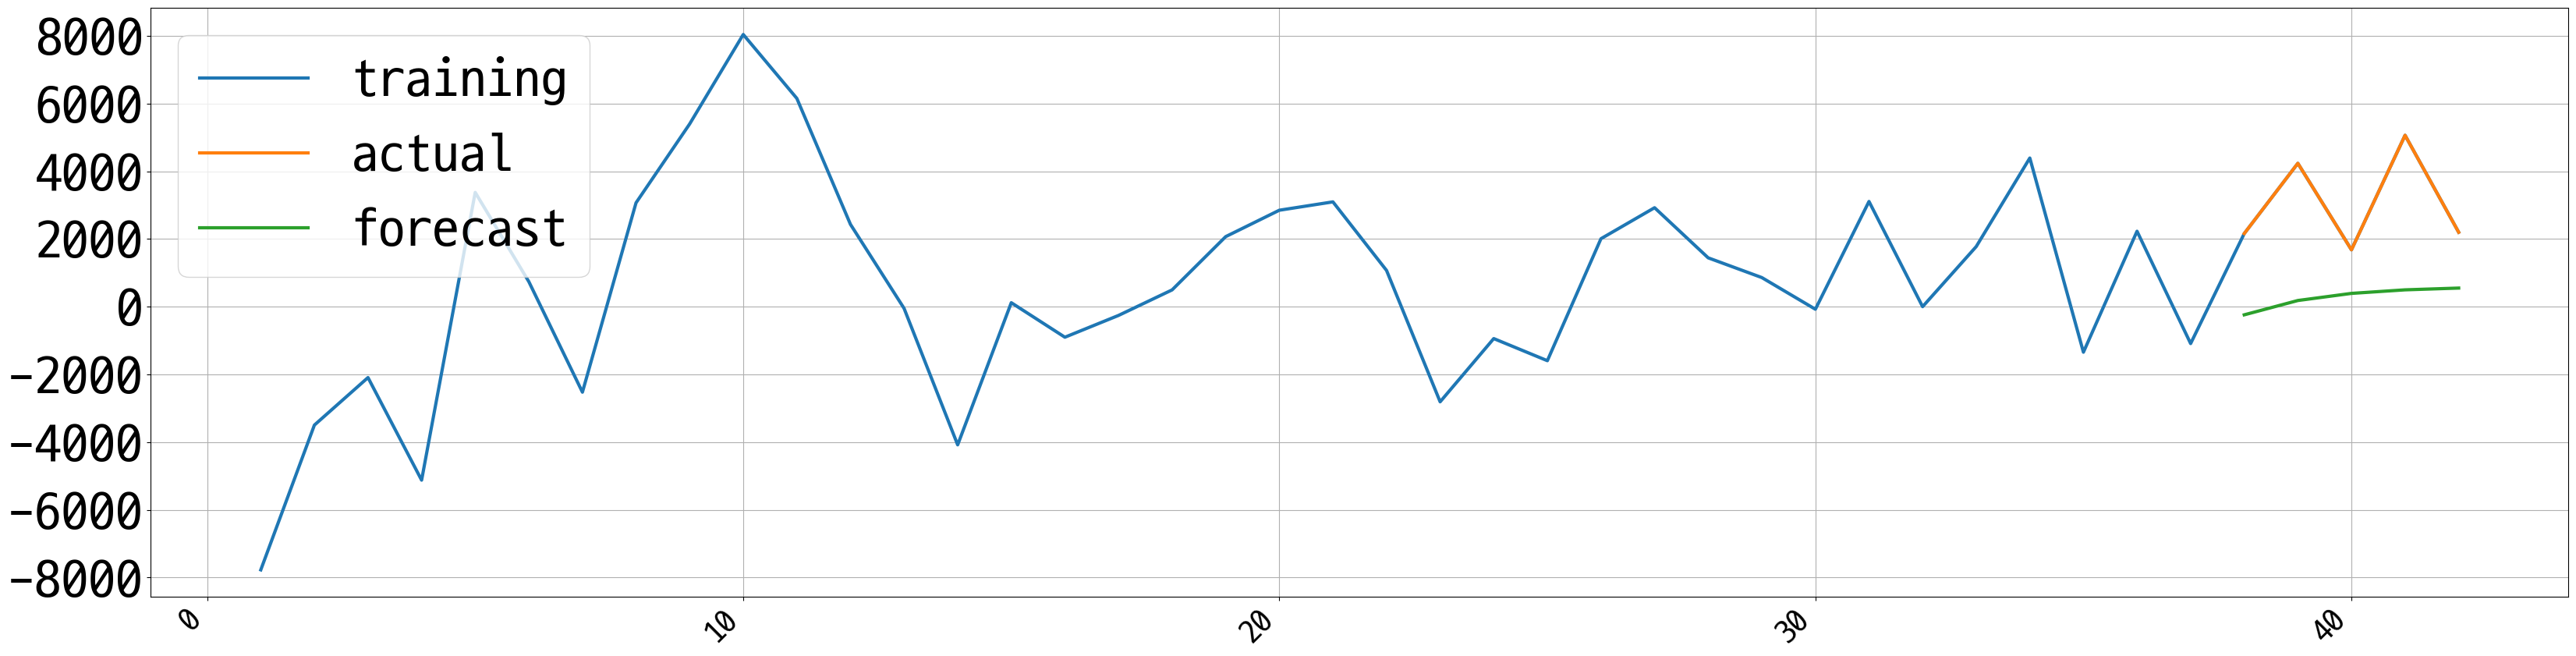

In [55]:
fc_series = model_fit.forecast(steps=5)

plt.figure(figsize=(40,10), dpi=100)
plt.plot(diff_1, linewidth = 3.0, label='training')
plt.plot(test,  linewidth = 3.0, label='actual')
plt.plot(fc_series, linewidth = 3.0, label='forecast')
plt.legend(fontsize=50)
plt.yticks(fontsize = 50); plt.xticks(fontsize = 30, rotation = 45, ha = 'right')
plt.grid(True)

#**** code for highlight the target area ***
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)